# Monte Carlo Simulation

In [15]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import matplotlib.animation as anima

In [16]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [12,9]
plt.rcParams['animation.html'] = 'html5'

**NB** The *html5* relies on [ffmpeg](https://ffmpeg.org) to convert between different media file formats. 

<div style="background-color:rgb(255,200,200)">
    <b>Task 1:</b> Write a routine to simulate 
    $$ y_i = \beta_0 + \sum^k_{j=1} \beta_1 x_{ji} + u_i, \qquad i = 1,...,T $$
    for any given coefficients $\beta_0$ and $\beta_j$, $j=1,...,k$. You may also wish to allow different distributional assumption for $u_i$ and $x_i$. 
</div> 

In [17]:
def simulate(p, period=1000, dist='norm', dp=1):
    """
    simualte a simple regression model with specific distributional assumption.
    Inputs:
        p: (k,) numpy array containing the parameter vector. 
        period: int. The number of observations to simualte. 
        dist: 'norm' or 't'. Distribution of the error terms.
        dp: positive scalar. In the case of dist=='norm', it is the variance of the error term. In the case of dist=='t', it is the degree of freedom. 
    Outputs:
        y: (period,) numpy array. Simulated dependent variable. 
        X: (period, 2) numpy array. Simulated explanatory variables. 
    """
    
    k = len(p)-1
    if dist=='norm':
        e = sps.norm.rvs(scale=np.power(dp,0.5), size=period)
    elif dist=='t':
        e = sps.t.rvs(df=dp, size=period)
    else:
        print('This distribution has not been implemented yet')
        exit()
        
    x = sps.norm.rvs(size=(period,k), scale=0.05)
    X = np.c_[np.ones(period), x]
    y = np.dot(X, p) + e
    return X, y 

<div style="background-color:rgb(255,200,200)">
    <p><b>Task 2</b> Write a rountine to compute the OLS estimator as well as the associated t-statistics given the data matrices of the dependent and explanatory variables. Recall the regression model 
    $$ \mathbf{y} = \mathbf{X}\pmb{\beta} + \mathbf{u} $$
    where $\mathbf{y}$ and $\mathbf{X}$ are $T\times 1$ and $T\times k$ matrices containing the data for the dependent variables and the $k$
        explanatory variables, respectively. $\pmb{\beta}$ is the $k\times 1$ vector of coefficients and $\mathbf{u}$ is the $T\times 1$ vector of residuals. </p>
    <p> The OLS estimator is defined to be 
        $$ \hat{\pmb{\beta}}_T = \left ( \mathbf{X}'\mathbf{X} \right )^{-1} \mathbf{X}'\mathbf{y}.$$
        and the variance-covariance matrix of the estimator is given by 
        $$ Var \left ( \hat{\pmb{\beta}}_T \right ) = \sigma^2_u \left ( \mathbf{X}'\mathbf{X} \right )'. $$ 
    </p> 
    <p> The t-statistics is given by 
        $$ t \left ( \hat{\beta}_i \right ) = \frac{\hat{\beta}_i}{\sqrt{Var(\hat{\beta}_i)}}, \qquad i=1,...,k.$$
    </p>
    <p> <b>Hints:</b> You may find  <i>numpy.dot()</i>, <i>numpy.diag()</i> and <i>numpy.linalg.inv()</i> useful. </p>
 </div>

In [18]:
def OLS(x,y):
    """
    Compute the OLS estimator. 
    Inputs:
        x: (T,k) numpy array. Containing the data matrix of k explanatory variables with T observations. 
        y: (T,) numpy array. Data matrix of the dependent variable. 
    Output:
        b: (k,) numpy array. The OLS estiamtes. 
        tstats: (k,) numpy array. The t-statistics.
    """

    try:
        Xinv = np.linalg.inv(np.dot(x.transpose(), x))
    except:
        print('Singular matrix')
        exit()
    temp = np.dot(x.transpose(), y)
    b = np.dot(Xinv, temp)
    e = y-np.dot(x,b)
    s = sum(np.power(e,2)) 
    se = s*np.diag(Xinv)
    tstats = b/np.power(se,0.5)
    return b,tstats

<div style="background-color:rgb(255,200,200)">
    <p> <b>Task 3:</b> Write a function that implement the following procedure:
        <ol>
            <li>Simulate the dependent and independent variables using the function from Task 1 with a given set of sample size $T$.</li> 
            <li>Compute the OLS estimates (and the associated t-statistics) based on the previous step using the function from Task 2.</li> 
            <li>Record the OLS estimates (and the associated t-statistics) into numpy arrays. </li>
            <li>Go back to step 1 and repeat until it reaches the desired number of replications. </li>
        </ol>
    </p>
</div>
     

In [19]:
def MC(p=[1,0.5], period=100, replication=100000, dist='norm', dp=1):
    """
    Monte Carlo simulaiton of either OLS estimator. 
    Inputs:
        p: (2,) numpy array containing the parameter vector. 
        period: int. The number of observations to simualte. 
        dist: 'norm' or 't'. Distribution of the error terms.
        dp: positive scalar. In the case of dist=='norm', it is the variance of the error term. In the case of dist=='t', it is the degree of freedom. 
    Outputs:
        b: (replication,) numpy array. The OLS estimates. 
        tstat: (replication,) numpy array. The t-statistics. 
    """

    k = len(p)
    b = np.zeros((replication,k))
    tstat = np.zeros((replication,k))
    for i in np.arange(0,replication):
        x,y = simulate(p,period=period, dist=dist, dp=dp)
        b[i], tstat[i] = OLS(x,y)
    return b, tstat

<div style="background-color:rgb(255,200,200)">
    <p><b>Task 4:</b> By using the function written from Task 3. Examine the following:
        <ul>
            <li>How does the estimator behave as the sample size $T$ increases? </li>
            <li>How do the variances of the error term and the explanatory variables affect the behaviour of the estimator? </li>
            <li>How do the t-statistics behave as the sample size increases? </li> 
        <ul> 
            </p> 
            <p> How would you present these results visually? </p> 
            <p><b>Hints:</b> You may wish to explore the following functions, in addition to the plotting functions you already know: 
                <ul> 
                    <li>matplotlib.pyplot.contour</li> 
                    <li>matplotlib.pyplot.hist2d</li>
                    <li> matplotlib.animation.FuncAnimation</li> 
            </ul>
            For the animation part, you can find a couple of examples from the notebook of Lecture 1. 
            </p> 
</div> 
                    

([array([    0.,     0.,     0.,     0.,   186., 99814.,     0.,     0.,
             0.,     0.]),
  array([1.0000e+01, 2.0000e+02, 2.6920e+03, 1.5193e+04, 3.5841e+04,
         3.2591e+04, 1.1701e+04, 1.6600e+03, 1.0700e+02, 5.0000e+00])],
 array([-9.47627108, -7.43915372, -5.40203636, -3.364919  , -1.32780164,
         0.70931572,  2.74643308,  4.78355044,  6.8206678 ,  8.85778516,
        10.89490252]),
 <a list of 2 Lists of Patches objects>)

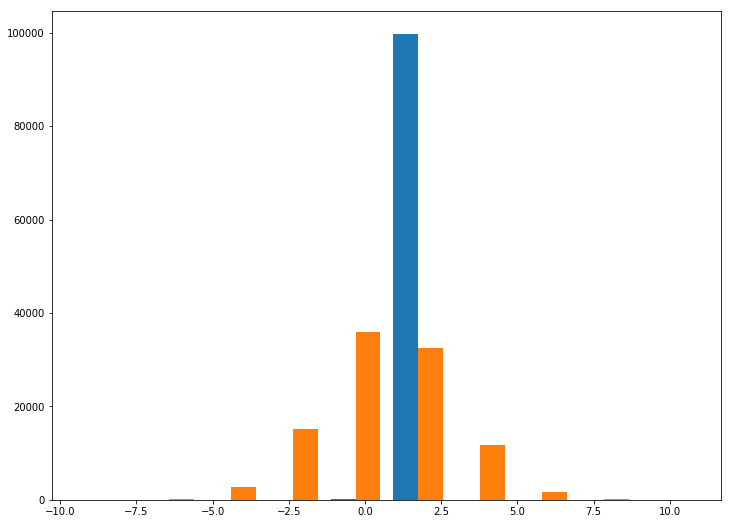

In [20]:
plot1 = MC()[0]

plt.hist(plot1)

([array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.9000e+01,
         6.8670e+03, 5.3013e+04, 3.6287e+04, 3.7060e+03, 9.8000e+01]),
  array([1.2360e+03, 4.0205e+04, 5.5164e+04, 3.3820e+03, 1.3000e+01,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])],
 array([-0.41137466, -0.20411132,  0.00315202,  0.21041536,  0.41767871,
         0.62494205,  0.83220539,  1.03946873,  1.24673207,  1.45399542,
         1.66125876]),
 <a list of 2 Lists of Patches objects>)

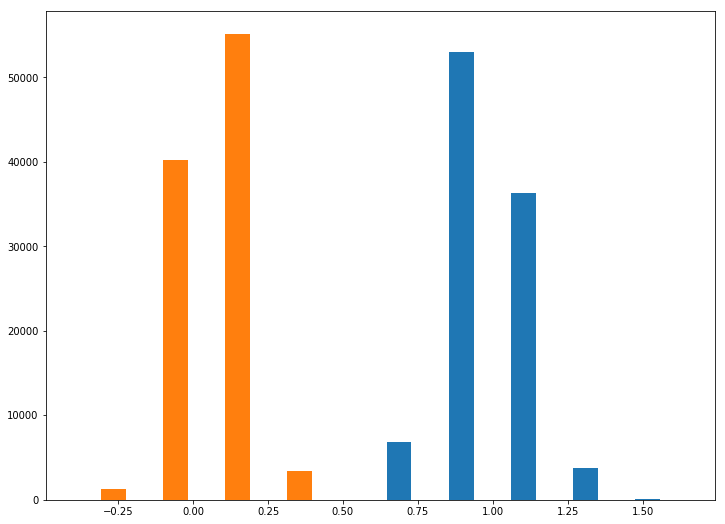

In [28]:
plot2 = MC()[1]

plt.hist(plot2)

In [21]:
plot1

array([[ 1.29809519, -0.65564924],
       [ 0.81552282, -0.95227346],
       [ 0.95894884,  2.47326604],
       ...,
       [ 1.01092482,  2.33073381],
       [ 1.0407381 , -0.21588036],
       [ 0.96476828,  5.36545286]])

In [22]:
plot1[0,1]

-0.6556492408925567

In [25]:
a = []
b = []

for i in range(0, len(plot1)):
    a.append(plot2[i,0])
    b.append(plot2[i,1])

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.52168586, 0.54492966, 0.56817347, 0.59141727, 0.61466107,
        0.63790487, 0.66114867, 0.68439248, 0.70763628, 0.73088008,
        0.75412388, 0.77736768, 0.80061149, 0.82385529, 0.84709909,
        0.87034289, 0.89358669, 0.91683049, 0.9400743 , 0.9633181 ,
        0.9865619 , 1.0098057 , 1.0330495 , 1.05629331, 1.07953711,
        1.10278091, 1.12602471, 1.14926851, 1.17251232, 1.19575612,
        1.21899992, 1.24224372, 1.26548752, 1.28873133, 1.31197513,
        1.33521893, 1.35846273, 1.38170653, 1.40495034, 1.42819414,
        1.45143794, 1.47468174, 1.49792554, 1.52116934, 1.54441315,
        1.56765695, 1.59090075, 1.61414455, 1.63738835, 1.66063216,
        1.68387596]),
 array([-0.44344707, -0.4243436 , -0.40524014, -0

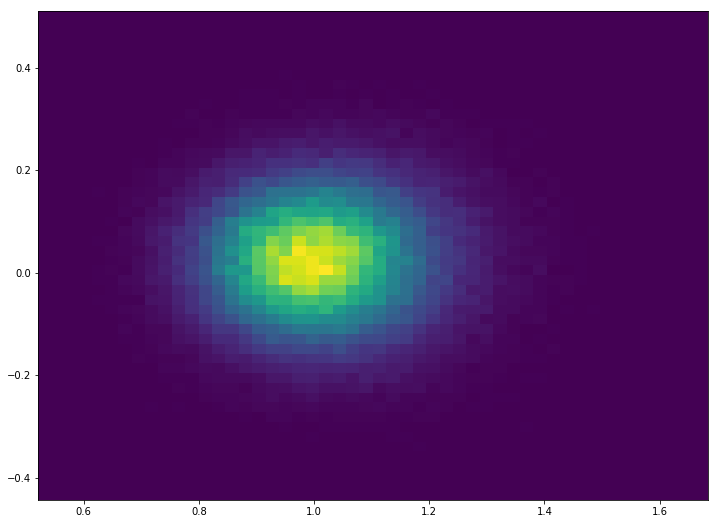

In [26]:
plt.hist2d(a, b, bins=50)